# Feature Selection

## <span style="color:red">Schritt 1: Import des Atticus Finch Datensatzes von GitHub</span>

In [14]:
import pandas as pd

# URL des Atticus Finch Datensatzes
url = 'https://raw.githubusercontent.com/OJanz/AtticusFinch/main/AtticusFinchSalesData_v1.csv'  

# Daten in Pandas Data Frame einlesen
df = pd.read_csv(url)

df = df.drop(['Store-ID'], axis = 1)

# Datensätze anzeigen
df

,Frequency,TiM,PPP,Central,Space,Sales
0,4740,198,268,1.18,364,710
1,7703,367,1314,1.10,802,2367
2,9928,303,1046,1.62,926,2325
3,10139,644,1290,1.46,1269,3284
4,11170,902,1142,1.00,1149,2429
...,...,...,...,...,...,...
154,84673,7741,10249,1.26,3426,16850
155,87728,3426,7468,1.42,3772,27607
156,88889,3426,7468,1.40,3772,27607
157,90824,3206,7774,1.16,3590,9387


<table style="border-collapse: collapse; width: 100%; height: 322px;" border="1">
<tbody>
<tr style="height: 46px;">
<td style="width: 26.6254%; height: 46px;">
<p style="text-align: left;"><strong><em>Store-ID</em></strong></p>
</td>
<td style="width: 73.3746%; height: 46px; text-align: left;">Eindeutige Nummer des Gesch&auml;fts</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; height: 46px;">
<p style="text-align: left;"><strong><em>Frequency</em></strong></p>
</td>
<td style="width: 73.3746%; height: 46px; text-align: left;">Kundenfrequenz zu einer bestimmten Stunde an einem bestimmten Tag (Messung einmal pro Jahr an allen Gesch&auml;ften)</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; height: 46px;">
<p style="text-align: left;"><strong><em>TiM</em></strong></p>
</td>
<td style="width: 73.3746%; height: 46px; text-align: left;">Turnover in Market: Einzehlandelsumsatz aller H&auml;ndler im Marktgebiet des Gesch&auml;fts</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; height: 46px;">
<p style="text-align: left;"><strong><em>PPP</em></strong></p>
</td>
<td style="width: 73.3746%; height: 46px; text-align: left;">Purchasing Power Potential: Kaufgraftpotenzial im Marktgebiet</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; height: 46px;">
<p style="text-align: left;"><strong><em>Central</em></strong></p>
</td>
<td style="width: 73.3746%; height: 46px; text-align: left;">Einzelhandelszentralit&auml;t (Wert gr&ouml;&szlig;er 1 zeigen an, dass die Stadt Kaufkraft aus dem Umland anzieht.)</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; text-align: left; height: 46px;"><strong><em>Space</em></strong></td>
<td style="width: 73.3746%; height: 46px; text-align: left;">
<p>Verkaufsfl&auml;che des Gesch&auml;fts</p>
</td>
</tr>
<tr style="height: 46px;">
<td style="width: 26.6254%; text-align: left; height: 46px;"><strong><em>Sales</em></strong></td>
<td style="width: 73.3746%; height: 46px; text-align: left;">
<p>Umsatz des Gesch&auml;fts</p>
</td>
</tr>
</tbody>
</table>
<pre>&nbsp;</pre>

## <span style="color:red">Schritt 2: Mit Scatterplots Überblick verschaffen</span>

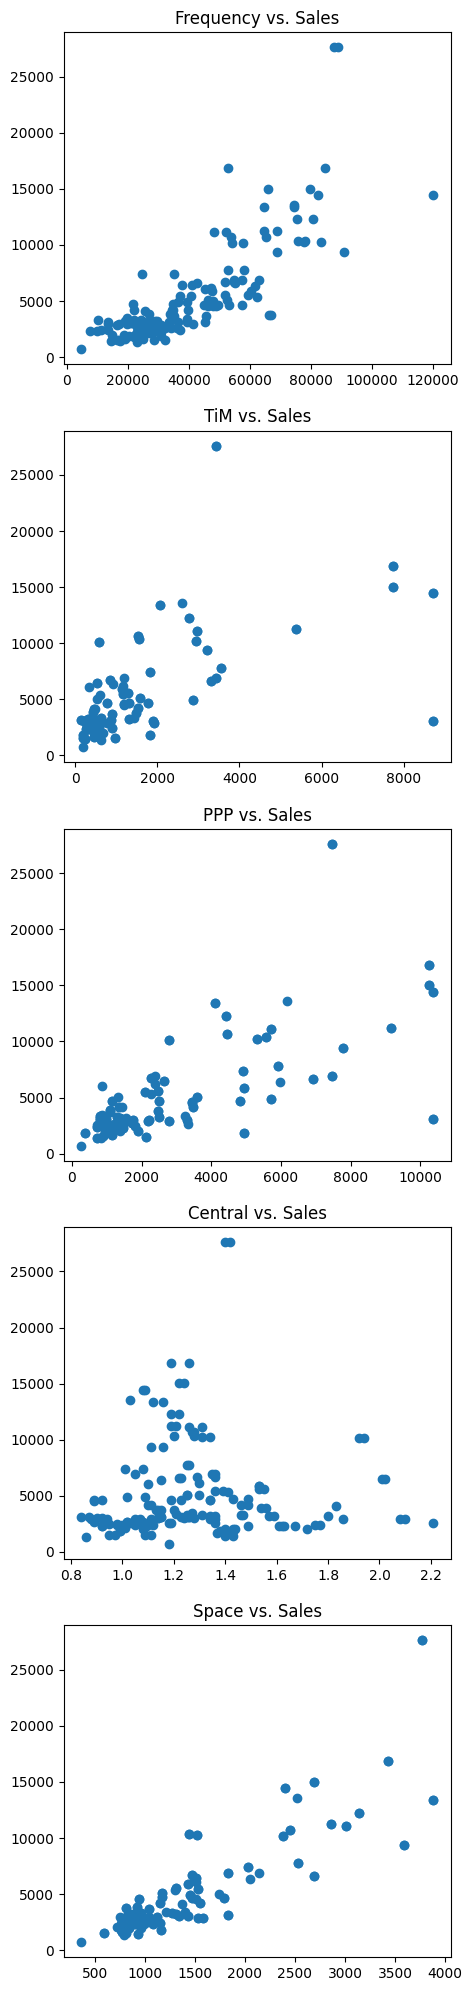

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(5, 1, figsize=(5, 25)) # figsize(width, height) -> Breite und Höhe (in Zoll) des Bereichs in dem alls Diagramme dargestellt werden.
axs[0].scatter(df['Frequency'], df['Sales'])
axs[0].set_title('Frequency vs. Sales')

axs[1].scatter(df['TiM'], df['Sales'])
axs[1].set_title('TiM vs. Sales')

axs[2].scatter(df['PPP'], df['Sales'])
axs[2].set_title('PPP vs. Sales')

axs[3].scatter(df['Central'], df['Sales'])
axs[3].set_title('Central vs. Sales')

axs[4].scatter(df['Space'], df['Sales'])
axs[4].set_title('Space vs. Sales')
                        
plt.show()

## <span style="color:red">Schritt 3: Ausreißer eliminieren</span>

In [3]:
#--------------------------------------------------------
# FUNKTION ZUR ELIMINIERUNG VON AUSREISSERN
#--------------------------------------------------------

def remove_outliers_iqr(df):
    
    # IQR berechnen und die Grenzen für Ausreißer je Variable (Spalte) berechnen
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Daten filtern, um Ausreißer zu entfernen
    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    # DataFrame mit den Ausreißern erstellen
    no_outliers = df[~df.index.isin(outliers.index)]

    # bereinigte Daten und Ausreißer zurückgeben
    return no_outliers, outliers

In [15]:
df = df.drop(['PPP'], axis = 1)
df = df.drop(['TiM'], axis = 1)
df = df.drop(['Central'], axis = 1)

In [16]:
df_no_outliers, df_outliers = remove_outliers_iqr(df)
df = df_no_outliers

df

,Frequency,Space,Sales
0,4740,364,710
1,7703,802,2367
2,9928,926,2325
3,10139,1269,3284
4,11170,1149,2429
...,...,...,...
141,66920,808,3762
147,75976,1445,10352
148,77743,1517,10222
149,78043,1445,10352


## <span style="color:red">Schritt 4: Bewertung der Abhängigkeiten mit einer Korrelationsmatrix</span>

In [17]:
corrmatrix = df.corr()   # Mit .corr kann die Korrelationsmatrix eines Data Frames erzeugt werden.

corrmatrix

,Frequency,Space,Sales
Frequency,1.000000,0.559489,0.795479
Space,0.559489,1.000000,0.778661
Sales,0.795479,0.778661,1.000000


In [18]:
import statsmodels.api as sm
import numpy as np

# X = Prädiktoren und y = Zielvariable
X = df.drop('Sales', axis = 1)
y = df['Sales']

X = sm.add_constant(X)  # konstanter Term (Intercept) hinzufügen

model = sm.OLS(y, X)  # OLS-Modell instanziieren
results = model.fit()  # Modell an die Daten anpassen

print(results.summary())  # Zusammenfassung der Modellergebnisse anzeigen


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     261.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           3.75e-47
Time:                        18:06:09   Log-Likelihood:                -1149.3
No. Observations:                 138   AIC:                             2305.
Df Residuals:                     135   BIC:                             2313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1517.0912    260.319     -5.828      0.0

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF für jeden Prädiktor berechnen
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

   variables       VIF
0      const  9.115416
1  Frequency  1.455663
2      Space  1.455663
